<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

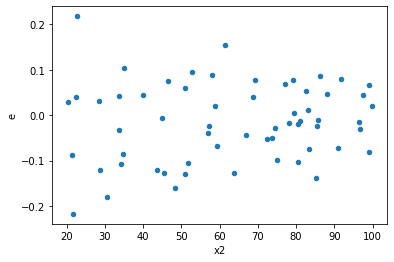

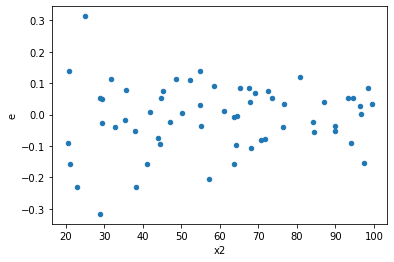

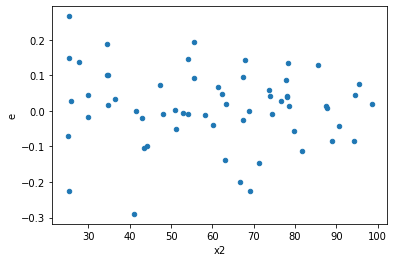

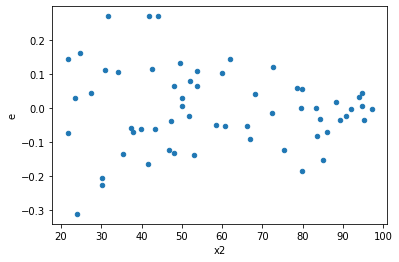

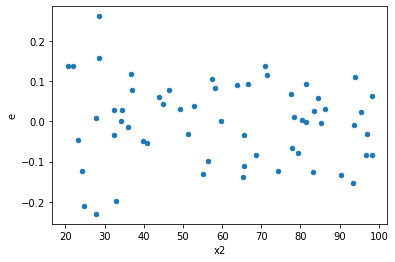

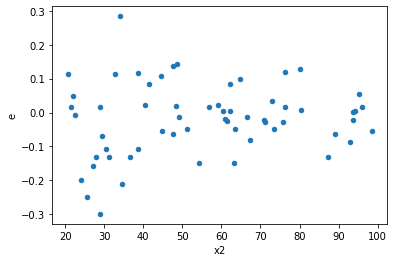

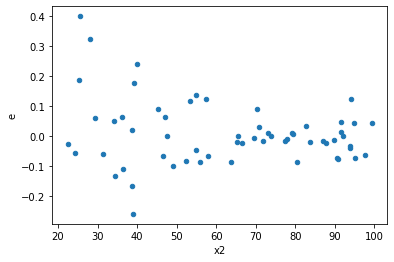

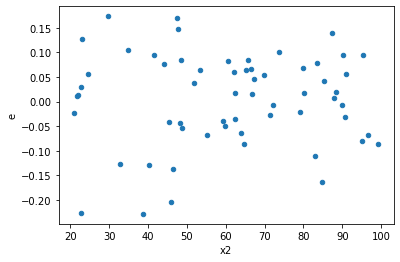

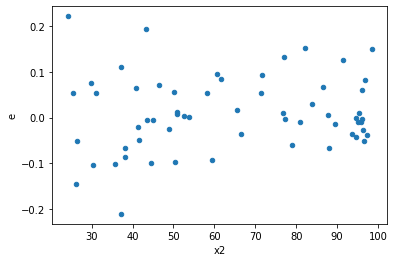

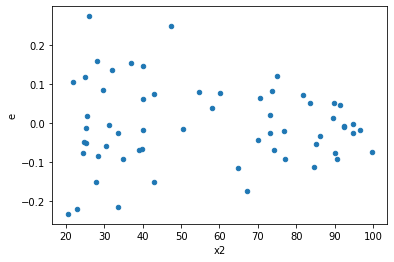

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
143.0,22.0,22.0,0.10513692936150959,0.11948598770678641,0.004778951334614073,0.005431181259399382,1.1364797168075746,0.7668127916557885,0.6165936041721057,0.38340639582789426,Reject005=1 : Homoscedasticity
217.0,22.0,22.0,0.20059682420909805,0.20845868970814332,0.009118037464049912,0.009475394986733788,1.0391923727109968,0.9289724644086905,0.5355137677956547,0.46448623220434526,Reject005=1 : Homoscedasticity
256.0,22.0,22.0,0.15826145794215882,0.17005159787577342,0.007193702633734492,0.007729618085262429,1.0744978599775294,0.8676925462241962,0.5661537268879019,0.4338462731120981,Reject005=1 : Homoscedasticity
305.0,22.0,22.0,0.19250589235368396,0.2013504571502424,0.008750267834258361,0.0091522935068292,1.0459443848103551,0.9170479925591399,0.54147600372043,0.45852399627956997,Reject005=1 : Homoscedasticity
555.0,22.0,22.0,0.18999267858192642,0.19769705905182472,0.00863603084463302,0.008986229956901124,1.040550933474924,0.9265655443039418,0.5367172278480291,0.4632827721519709,Reject005=1 : Homoscedasticity
726.0,22.0,22.0,0.13080428710659084,0.1525541542578632,0.005945649413935947,0.006934279738993782,1.1662779380736097,0.7214768872869164,0.6392615563565418,0.3607384436434582,Reject005=1 : Homoscedasticity
892.0,22.0,22.0,0.16886081458046567,0.20847444063416126,0.007675491571839349,0.009476110937916421,1.2345933611188336,0.6254048994987245,0.6872975502506378,0.31270244974936223,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.33991574913250405,0.1791314238819528,0.015450715869659275,0.008142337449179672,0.5269877148649702,0.14073734641461558,Reject005=1 : Homoscedasticity
1.0,22.0,22.0,0.2346047619168108,0.09199018470121915,0.010663852814400491,0.0041813720318735976,0.392107065302614,0.032886211729771866,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.22412237640130897,0.13889126212637873,0.010187380745514044,0.006313239187562669,0.6197117144505145,0.2694440591482052,Reject005=1 : Homoscedasticity
3.0,22.0,22.0,0.15212659608688542,0.11131848306722865,0.00691484527667661,0.005059931048510393,0.7317489901874248,0.46984575776375764,Reject005=1 : Homoscedasticity
4.0,22.0,22.0,0.46869638581469486,0.14405946918050191,0.021304381173395222,0.006548157690022815,0.3073620227092122,0.007752573188889895,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.4080585245415478,0.05202740733210391,0.018548114751888535,0.0023648821514592687,0.12749986632568577,9.171023499920633e-06,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.49143083915173774,0.2122557169006046,0.02233776541598808,0.009647987131845663,0.43191370990673006,0.05492778591696188,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,0.1979472818588799,0.08939220781738245,0.008997603720858177,0.004063282173517384,0.45159603596432174,0.0687387137748474,Reject005=1 : Homoscedasticity
8.0,22.0,22.0,0.4668895520691038,0.11570137638926782,0.021222252366777446,0.005259153472239446,0.24781316239893708,0.0018228728765145074,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    702
Reject005=1 : Homoscedasticity      298
Name: Result_test, dtype: int64